In [13]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
file = "E:/taniesta/Columbia University/digital center intership/intro-to-data-master/taxi-data.csv"
df = pd.read_csv(file)
print(df.shape)
df.head()

(769940, 9)


,pickup,dropoff,passengers,distance,fare,tip,total,payment_type,payment
0,2018-02-01 00:39:38,2018-02-01 00:39:41,1,0.00,20.0,3.00,23.00,1,Credit Card
1,2018-02-01 00:58:28,2018-02-01 01:05:35,5,1.60,7.5,0.88,9.68,1,Credit Card
2,2018-02-01 00:56:05,2018-02-01 01:18:54,1,9.60,28.5,5.96,35.76,1,Credit Card
3,2018-02-01 00:12:40,2018-02-01 00:15:50,1,0.73,4.5,0.00,5.80,2,Cash
4,2018-02-01 00:45:18,2018-02-01 00:51:56,2,1.87,8.0,0.00,9.30,2,Cash


In [3]:
count = pd.value_counts(df["payment_type"])
count

1    420696
2    344324
3      3405
4      1480
5        35
Name: payment_type, dtype: int64

# Bar plots and Histogram in Python

Using bar chart is a good choice when you want to show how a certain quantity varies among discrete set of items.

Histograms are frequently used to show brief information about the distribution of a (discrete or continuous) variable.

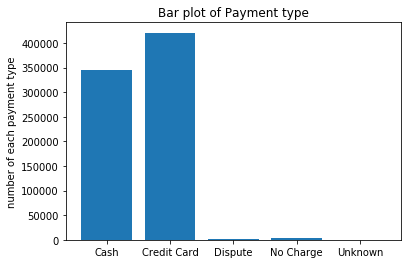

In [27]:
name = ["Credit Card", "Cash", "No Charge","Dispute","Unknown"]
plt.bar(name,count)
plt.ylabel("number of each payment type")
plt.title("Bar plot of Payment type")
plt.show()

The histogram below should be quivalent to the bar chart above, but in descending order.

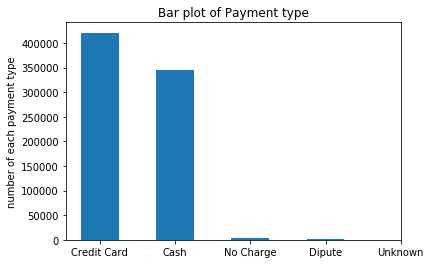

In [15]:
plt.hist(df["payment_type"], bins = 8)
plt.ylabel("number of each payment type")
plt.xticks(np.array(range(1,6))+.25,name)
plt.title("Bar plot of Payment type")
plt.show()

The histogram for a continuous variable (distance).

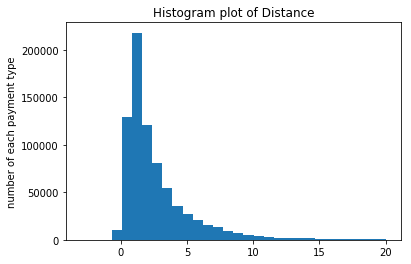

In [35]:
plt.hist(df["distance"], bins = 30, range = [-3,20])
plt.ylabel("number of each payment type")
plt.title("Histogram plot of Distance")
plt.show()

## Scatter plot

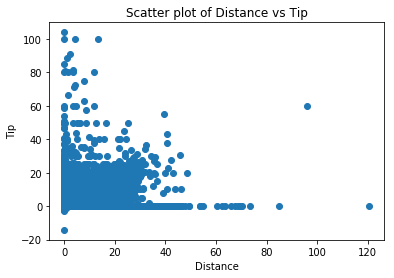

In [21]:
plt.scatter(df['distance'],df['tip'])
plt.xlabel("Distance")
plt.ylabel("Tip")
plt.title("Scatter plot of Distance vs Tip")
plt.show()

## Box plot
A box plot is a method for graphically depicting numerical data through their quartiles. Outliers may be plotted as individual points.

The ends of the whiskers can be maximum and minimum values, but can also be 9th and the 91st percentiles.

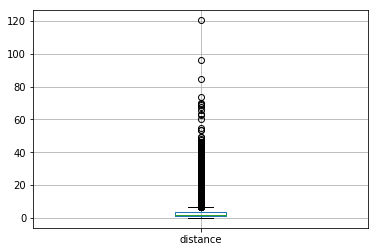

In [22]:
df['distance'].plot(kind='box', grid=True)
plt.show()

Let's zoom in to see what should a boxplot look like.

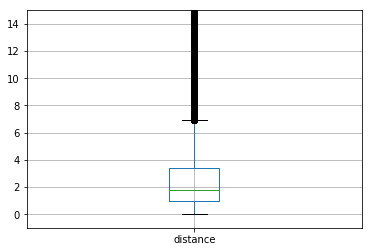

In [36]:
df['distance'].plot(kind='box', grid=True)
plt.ylim(-1,15)
plt.show()

What if we want to see box plots of distances vs different payment methods?

Approach 1:

Split the distance data by different payment methods.

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


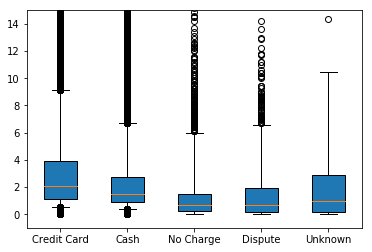

In [24]:
df.sort_values(by = 'payment_type', inplace = True)
Distance = []
Levels = df['payment'].unique()
for payment in Levels:
    Distance.append(df.loc[df.payment==payment, 'distance'])
plt.boxplot(x = Distance, patch_artist = True, labels = Levels,whis=[5, 95])
plt.ylim(-1,15)
plt.show()

Approach 2:

Use seaborn module.

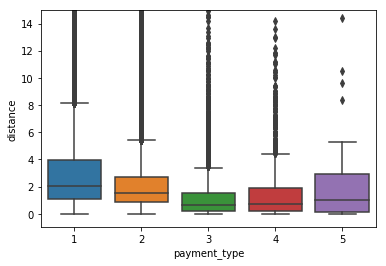

In [25]:
import seaborn as sns
plt.figure()
sns.boxplot(x="payment_type", y="distance", data=df)
plt.ylim(-1,15)
plt.show()